## Primary Production - Version 1
**Developed for the OOI Data Lab Notebook**

By Sage Lichtenwalner, January 8, 2020

In [ ]:
# Notebook Setup
import requests
import os
import re
import xarray as xr
import dask
! pip install netcdf4==1.5.0
import matplotlib.pyplot as plt
import numpy as np

# Setup default plot styles
import seaborn as sns
sns.set()

     |████████████████████████████████| 3.9MB 2.8MB/s 
     |████████████████████████████████| 317kB 32.1MB/s 


## 1. Request Data from OOINet
Coastal Pioneer Offshore Surface Mooring ([CP04OSSM](https://datareview.marine.rutgers.edu/sites/view/CP04OSSM))

* **Instruments:** 
  * Temperature, Salinity, DO
  * Chlorophyll 
  * Nitrate
  * PAR or Irradiance (METBK, SPKIR or OPTAA?)
* **Time range:** 
  * 2016-01-01 00:00:00 to 2020-01-08 00:00:00


In [ ]:
def request_data(reference_designator,method,stream,start_date=None,end_date=None):
  site = reference_designator[:8]
  node = reference_designator[9:14]
  instrument = reference_designator[15:]
  
  # Create the request URL
  api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
  data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))

  # All of the following are optional, but you should specify a date range
  params = {
    'format':'application/netcdf',
    'include_provenance':'true',
    'include_annotations':'true'
  }
  if (start_date):
    params['beginDT'] = start_date
  if (end_date):
    params['endDT'] = end_date

  # Make the data request
  r = requests.get(data_request_url, params=params, auth=(API_USERNAME, API_TOKEN))
  data = r.json()
  
  # Return just the THREDDS URL
  return data['allURLs'][0] 

In [ ]:
API_USERNAME = ''
API_TOKEN = ''

In [ ]:
# Data Requests 
# CP04
# request_data('CP04OSSM-RID27-04-DOSTAD000','telemetered','dosta_abcdjm_dcl_instrument',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP04OSSM-RID27-02-FLORTD000','telemetered','flort_sample',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP04OSSM-RID26-07-NUTNRB000','telemetered','suna_dcl_recovered',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP04OSSM-SBD11-06-METBKA000','telemetered','metbk_a_dcl_instrument',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')

In [ ]:
# CP01
# request_data('CP01CNSM-RID27-04-DOSTAD000','telemetered','dosta_abcdjm_dcl_instrument',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP01CNSM-RID27-02-FLORTD000','telemetered','flort_sample',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP01CNSM-RID26-07-NUTNRB000','telemetered','suna_dcl_recovered',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP01CNSM-SBD11-06-METBKA000','telemetered','metbk_a_dcl_instrument',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')

In [ ]:
# CP03
# request_data('CP03ISSM-RID27-04-DOSTAD000','telemetered','dosta_abcdjm_dcl_instrument',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP03ISSM-RID27-02-FLORTD000','telemetered','flort_sample',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP03ISSM-RID26-07-NUTNRB000','telemetered','suna_dcl_recovered',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')
# request_data('CP03ISSM-SBD11-06-METBKA000','telemetered','metbk_a_dcl_instrument',
#              '2016-01-01T00:00:00.000Z','2020-01-10T00:00:00.000Z')


## 2. Load Data Files

In [ ]:
# CP04
url_do = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T165439411Z-CP04OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/catalog.html'
url_flort = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T165516548Z-CP04OSSM-RID27-02-FLORTD000-telemetered-flort_sample/catalog.html'
url_nutnr_old = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T165528961Z-CP04OSSM-RID26-07-NUTNRB000-telemetered-nutnr_b_dcl_full_instrument/catalog.html'
url_nutnr = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T202248004Z-CP04OSSM-RID26-07-NUTNRB000-telemetered-suna_dcl_recovered/catalog.html'
url_metbk = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T165540862Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

fig_title = 'Coastal Pioneer Offshore Surface Mooring CP04OSSM'
fig_file = 'CP04OSSM'

In [ ]:
# CP01
url_do = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200109T023944201Z-CP01CNSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/catalog.html'
url_flort = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200109T024000999Z-CP01CNSM-RID27-02-FLORTD000-telemetered-flort_sample/catalog.html'
url_nutnr = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T205634157Z-CP01CNSM-RID26-07-NUTNRB000-telemetered-suna_dcl_recovered/catalog.html'
url_metbk = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200109T024019780Z-CP01CNSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

fig_title = 'Coastal Pioneer Central Surface Mooring CP01CNSM'
fig_file = 'CP01CNSM'

In [ ]:
# CP03
url_do = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200109T024052281Z-CP03ISSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument/catalog.html'
url_flort = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200109T024102545Z-CP03ISSM-RID27-02-FLORTD000-telemetered-flort_sample/catalog.html'
url_nutnr = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200108T205705850Z-CP03ISSM-RID26-07-NUTNRB000-telemetered-suna_dcl_recovered/catalog.html'
url_metbk = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20200109T024115339Z-CP03ISSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

fig_title = 'Coastal Pioneer Inshore Surface Mooring CP03ISSM'
fig_file = 'CP03ISSM'

In [ ]:
def get_data(url,bad_inst=''):
  '''Function to grab all data from specified directory'''
  tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
  datasets = requests.get(url).text
  urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
  x = re.findall(r'(ooi/.*?.nc)', datasets)
  for i in x:
    if i.endswith('.nc') == False:
      x.remove(i)
  for i in x:
    try:
      float(i[-4])
    except:
      x.remove(i)
  datasets = [os.path.join(tds_url, i) for i in x]
  
  # Remove extraneous files if necessary
  selected_datasets = []
  for d in datasets:
    if (bad_inst) and bad_inst in d:
      pass
    elif 'ENG000' in d: #Remove engineering streams for gliders
      pass
    else:
      selected_datasets.append(d)
#   print(selected_datasets)
  selected_datasets = sorted(selected_datasets)
  
  # Load in dataset
  ds = xr.open_mfdataset(selected_datasets)
  ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
  ds = ds.chunk({'time': 1000}) # Used for optimization
  # ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
  return ds

In [ ]:
def reject_outliers(data, m=5):
    """
    Reject outliers beyond m standard deviations of the mean.
    :param data: numpy array containing data
    :param m: number of standard deviations from the mean. Default: 3
    """
    stdev = np.nanstd(data)
    if stdev > 0.0:
        ind = abs(data - np.nanmean(data)) < m * stdev
    else:
        ind = len(data) * [True]

    return ind

In [ ]:
%%time
# Load Data
data_do = get_data(url_do,'ctdbp')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


CPU times: user 8.7 s, sys: 426 ms, total: 9.13 s
Wall time: 35.2 s


In [ ]:
%%time
data_do = data_do[['temp','practical_salinity','dissolved_oxygen']].to_dataframe()
data_do = data_do.resample('1D').mean()

CPU times: user 24.4 s, sys: 4.07 s, total: 28.5 s
Wall time: 46.6 s


In [ ]:
%%time
data_chl = get_data(url_flort,'ctdbp')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


CPU times: user 12.8 s, sys: 568 ms, total: 13.3 s
Wall time: 42.9 s


In [ ]:
%%time
data_chl = data_chl[['fluorometric_chlorophyll_a']].to_dataframe()
data_chl = data_chl.resample('1D').mean()

CPU times: user 17.8 s, sys: 2.25 s, total: 20 s
Wall time: 26.6 s


In [ ]:
%%time
data_nut = get_data(url_nutnr,'ctdbp')
data_nut = data_nut[['salinity_corrected_nitrate']].to_dataframe()
data_nut = data_nut.resample('1D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


CPU times: user 1.19 s, sys: 132 ms, total: 1.32 s
Wall time: 9.11 s


In [ ]:
%%time
data_met = get_data(url_metbk,'velpt')
data_met = data_met[['longwave_irradiance','shortwave_irradiance','met_netsirr']].to_dataframe()
data_met = data_met.resample('1D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


CPU times: user 6.62 s, sys: 764 ms, total: 7.38 s
Wall time: 30.8 s


In [ ]:
# Remove Outliers
data_do['practical_salinity'] = data_do['practical_salinity'].where(reject_outliers(data_do['practical_salinity']))
data_chl['fluorometric_chlorophyll_a'] = data_chl['fluorometric_chlorophyll_a'].where(reject_outliers(data_chl['fluorometric_chlorophyll_a']))
data_do['dissolved_oxygen'] = data_do['dissolved_oxygen'].where(reject_outliers(data_do['dissolved_oxygen']))
data_nut['salinity_corrected_nitrate'] = data_nut['salinity_corrected_nitrate'].where(reject_outliers(data_nut['salinity_corrected_nitrate']))


In [ ]:
# data_met['shortwave_irradiance'] = data_met['shortwave_irradiance'].where(reject_outliers(data_met['shortwave_irradiance']))
data_met['shortwave_irradiance'] = data_met['shortwave_irradiance'].where(data_met['shortwave_irradiance']<1000)
data_met['shortwave_irradiance'] = data_met['shortwave_irradiance'].where(data_met['shortwave_irradiance']>0)


## Plot the Data

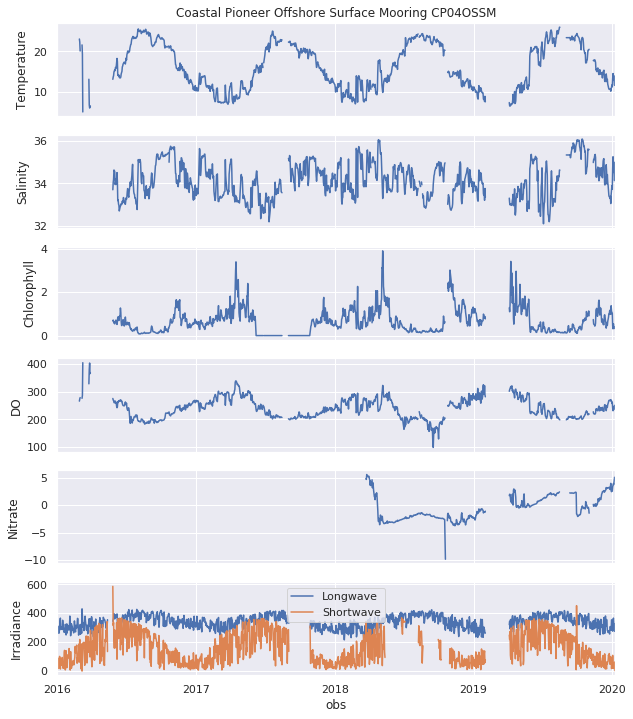

In [ ]:
# Plot Temp, Salinty, Chl, DO, Nitrate, Irradiance
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,sharex=True,figsize=(10,12))
data_do.temp.plot(ax=ax1)
data_do.practical_salinity.plot(ax=ax2)
data_chl.fluorometric_chlorophyll_a.plot(ax=ax3)
data_do.dissolved_oxygen.plot(ax=ax4)
data_nut.salinity_corrected_nitrate.plot(ax=ax5)

data_met.longwave_irradiance.plot(ax=ax6,label='Longwave')
data_met.shortwave_irradiance.plot(ax=ax6,label='Shortwave')
ax6.legend();

ax1.set_xlabel('');
ax2.set_xlabel('');
ax3.set_xlabel('');
ax4.set_xlabel('');
ax5.set_xlabel('');
ax1.set_ylabel('Temperature');
ax2.set_ylabel('Salinity');
ax3.set_ylabel('Chlorophyll');
ax4.set_ylabel('DO');
ax5.set_ylabel('Nitrate');
ax6.set_ylabel('Irradiance');
ax1.set_title(fig_title);

fig.savefig(fig_file + '.png')

## Average and Merge

In [ ]:
%%time
# Subset and Average Datasets
avgint='1H'

a = data_ce01[['practical_salinity','ctdbp_seawater_temperature','ctdbp_seawater_pressure','density']].load().resample(time=avgint).mean()
b = data_gi[['practical_salinity','ctdmo_seawater_temperature','ctdmo_seawater_pressure','density']].load().resample(time=avgint).mean()
c = data_gp[['practical_salinity','ctdmo_seawater_temperature','ctdmo_seawater_pressure','density']].load().resample(time=avgint).mean()
d = data_cp04[['practical_salinity','temp','pressure','density']].load().resample(time=avgint).mean()


CPU times: user 24.2 s, sys: 1.17 s, total: 25.4 s
Wall time: 25 s


In [ ]:
# Merge the datasets
a = a.rename({'practical_salinity':'CE01 Salinity',
              'ctdbp_seawater_temperature':'CE01 Temperature',
              'ctdbp_seawater_pressure':'CE01 Pressure',
              'density':'CE01 Density'})
b = b.rename({'practical_salinity':'GI Salinity',
              'ctdmo_seawater_temperature':'GI Temperature',
              'ctdmo_seawater_pressure':'GI Pressure',
              'density':'GI Density'})
c = c.rename({'practical_salinity':'GP Salinity',
              'ctdmo_seawater_temperature':'GP Temperature',
              'ctdmo_seawater_pressure':'GP Pressure',
              'density':'GP Density'})
d = d.rename({'practical_salinity':'CP04 Salinity',
              'temp':'CP04 Temperature',
              'pressure':'CP04 Pressure',
              'density':'CP04 Density'})

data = xr.merge([a,b,c,d]).to_dataframe()

# Print the first few rows
data.head()

,CE01 Salinity,CE01 Temperature,CE01 Pressure,CE01 Density,GI Salinity,GI Temperature,GI Pressure,GI Density,GP Salinity,GP Temperature,GP Pressure,GP Density,CP04 Salinity,CP04 Temperature,CP04 Pressure,CP04 Density
time,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,33.788763,8.892237,7.483318,1026.223307,34.833886,5.705310,40.347050,1027.646825,32.411900,8.232855,40.052755,1025.394762,34.564724,20.385206,7.277695,1024.364559
2018-07-01 01:00:00,33.793698,8.709283,7.465790,1026.256737,34.828762,5.827512,38.042649,1027.616844,32.418109,7.984896,39.900592,1025.435481,34.601171,20.630014,7.257083,1024.326720
2018-07-01 02:00:00,33.765574,9.005616,7.551592,1026.187914,34.826691,6.246711,36.208625,1027.552804,32.408347,8.839796,39.732913,1025.298152,34.677626,20.704903,7.268110,1024.364800
2018-07-01 03:00:00,33.728845,9.382999,7.488455,1026.099381,34.846543,5.986879,35.408074,1027.598418,32.438098,7.676994,39.376155,1025.492569,34.694660,20.482090,7.246140,1024.437522
2018-07-01 04:00:00,33.741743,9.252484,7.433023,1026.129519,34.856695,5.886106,35.225639,1027.618196,32.423239,8.074393,39.092450,1025.421741,34.768563,20.643913,7.263570,1024.450445


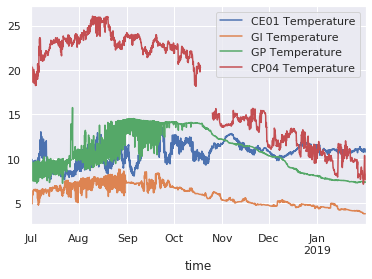

In [ ]:
# Test plot
data[['CE01 Temperature','GI Temperature','GP Temperature','CP04 Temperature']].plot()

In [ ]:
# Export to CSV
data.to_csv('density.csv')